In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.2.4
numpy   version: 1.20.1
seaborn version: 0.11.1


In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


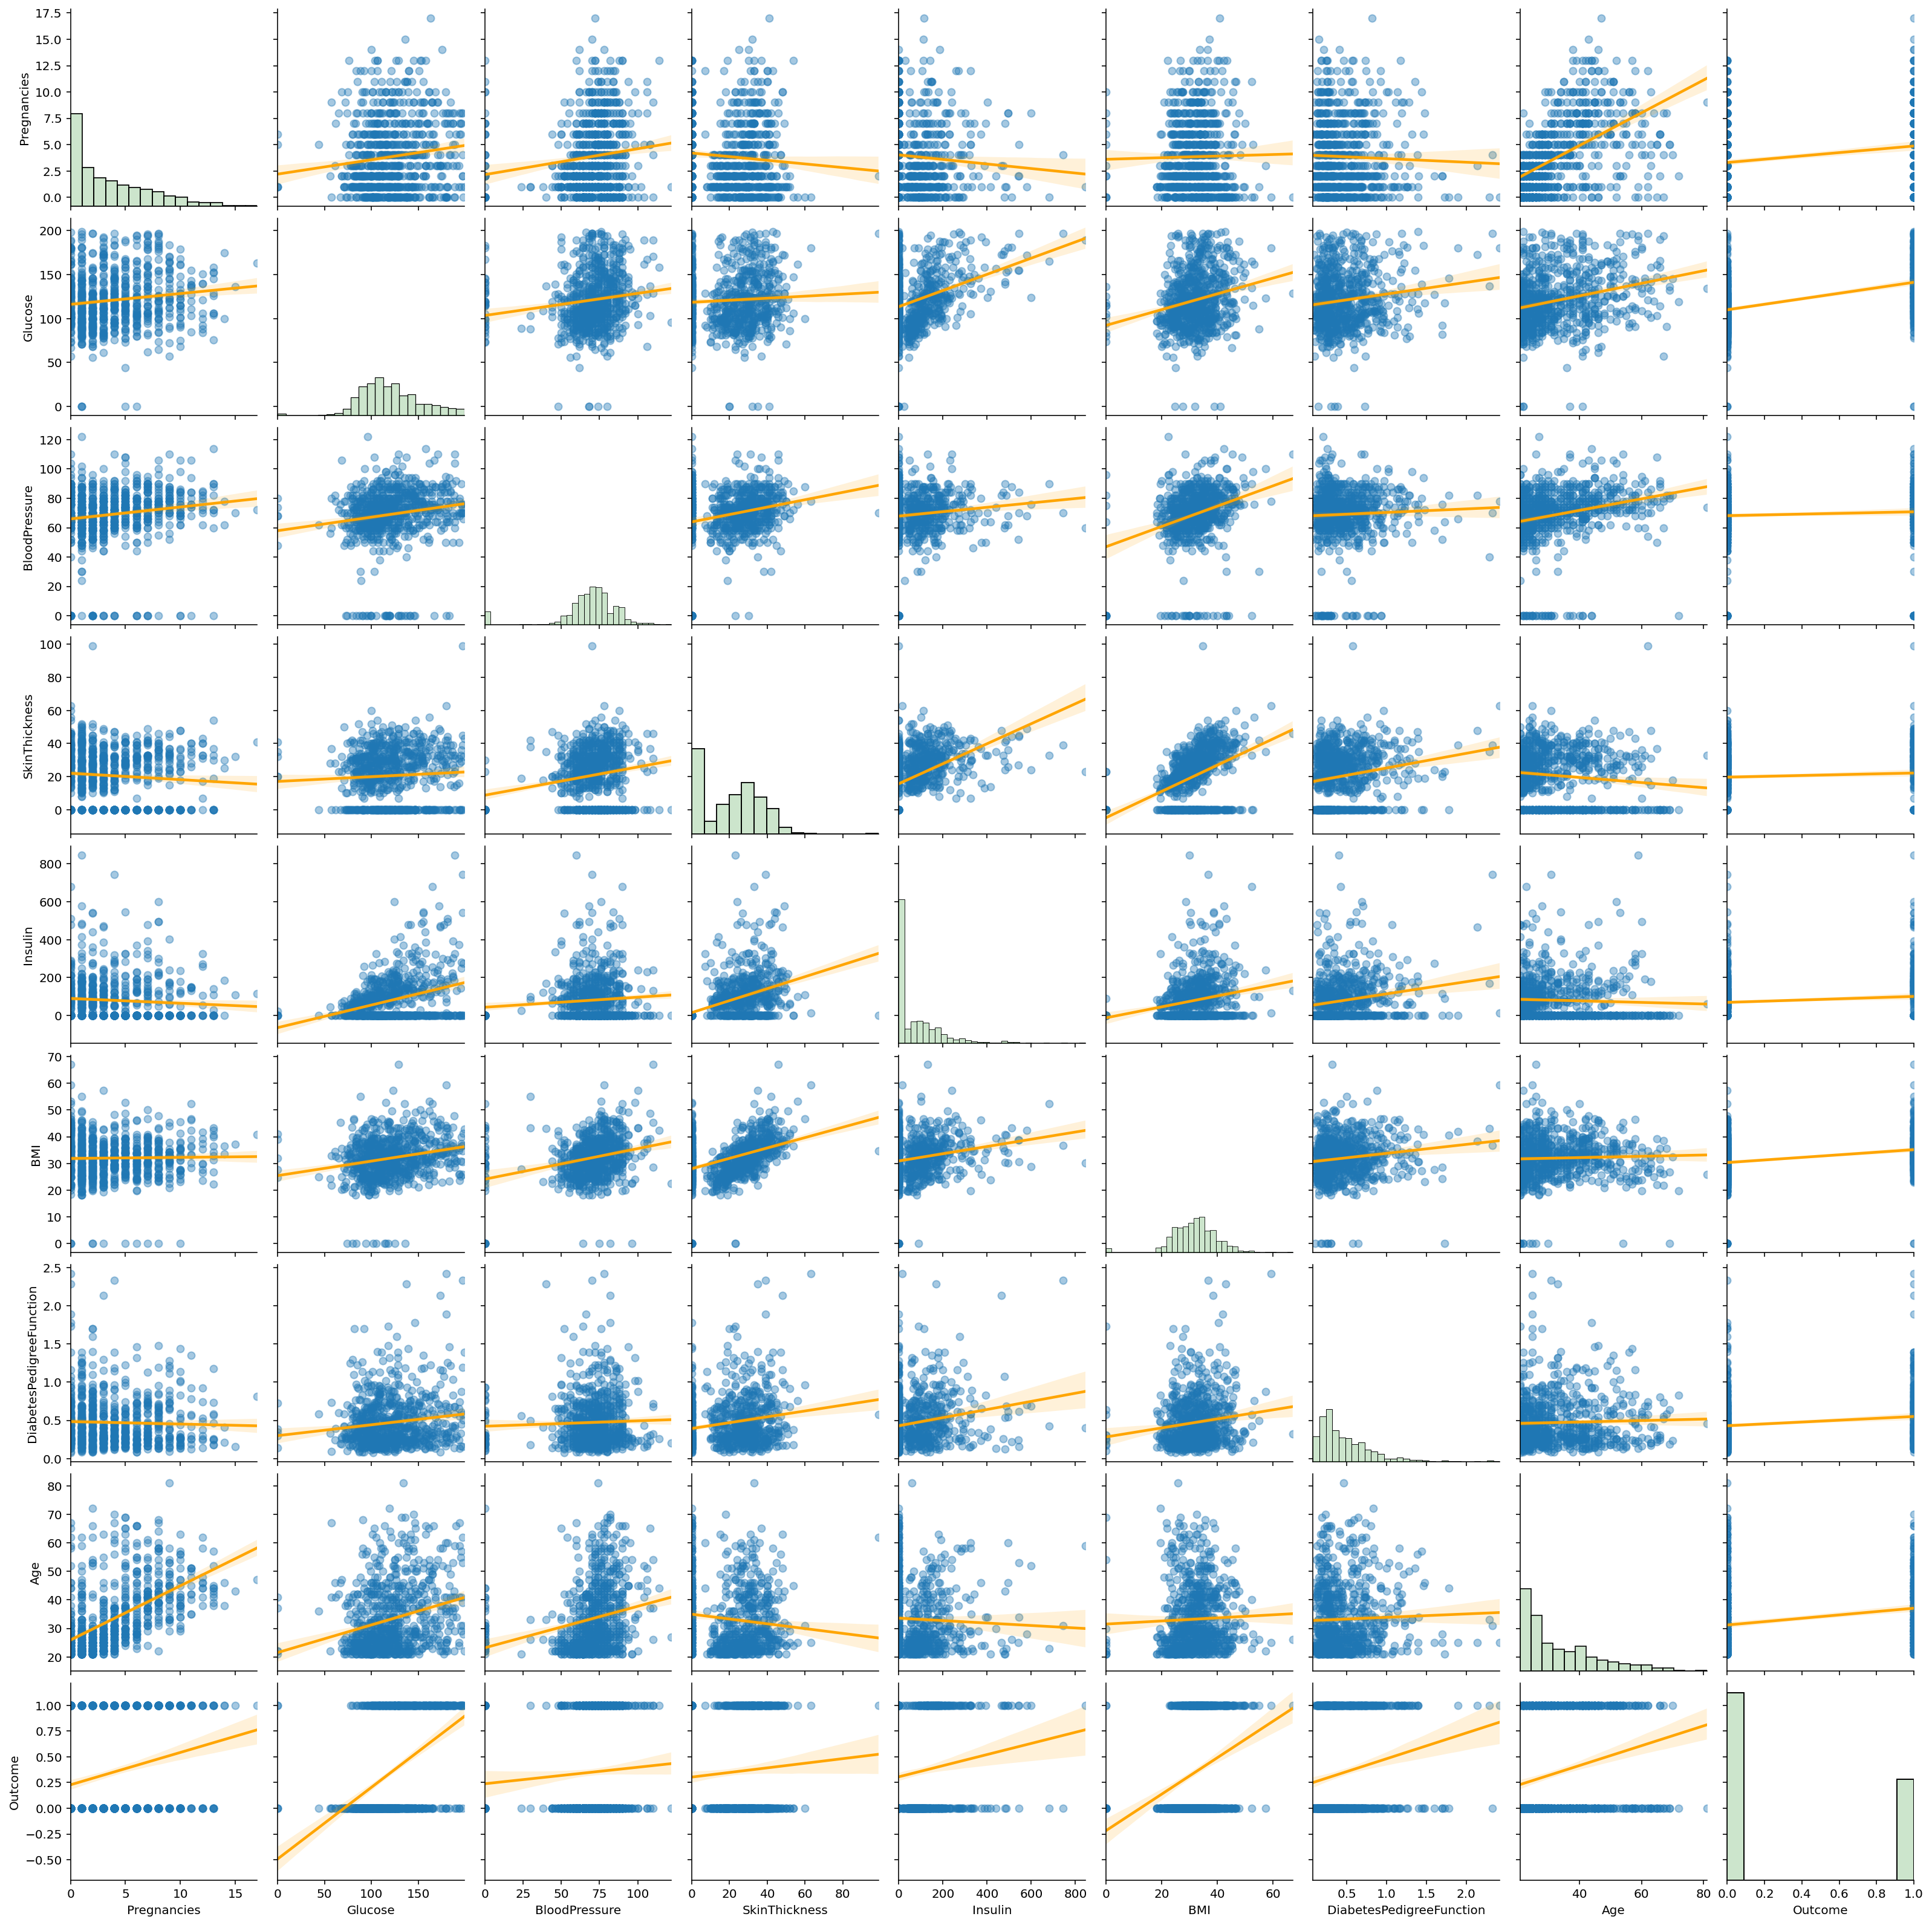

In [6]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [53]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [54]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.24.1


In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
 model= DecisionTreeClassifier(random_state=7)
#model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
model.fit(X,y)

DecisionTreeClassifier(random_state=7)

In [57]:
model.feature_importances_

array([0.05410434, 0.31816043, 0.1153007 , 0.01446441, 0.02780768,
       0.2304674 , 0.13514532, 0.10454973])

In [58]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.014464
Insulin                     0.027808
Pregnancies                 0.054104
Age                         0.104550
BloodPressure               0.115301
DiabetesPedigreeFunction    0.135145
BMI                         0.230467
Glucose                     0.318160
dtype: float64

In [59]:
fs.sum()

1.0

<AxesSubplot:>

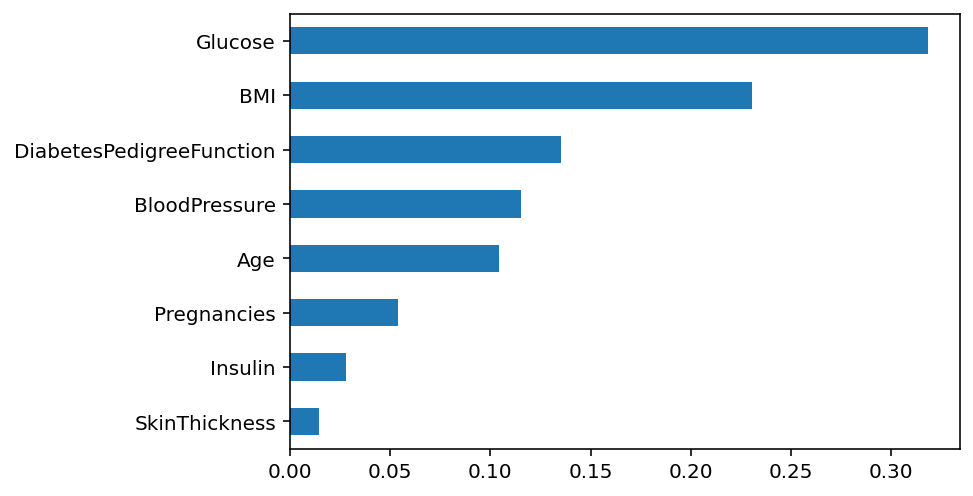

In [60]:
fs.plot(kind='barh')

In [61]:
fs[fs > .1]

Age                         0.104550
BloodPressure               0.115301
DiabetesPedigreeFunction    0.135145
BMI                         0.230467
Glucose                     0.318160
dtype: float64

In [62]:
fs.nlargest(4) #.index

Glucose                     0.318160
BMI                         0.230467
DiabetesPedigreeFunction    0.135145
BloodPressure               0.115301
dtype: float64

In [63]:
fs[fs > .1].index

Index(['Age', 'BloodPressure', 'DiabetesPedigreeFunction', 'BMI', 'Glucose'], dtype='object')

In [64]:
X=df[fs[fs > .1].index]
X.head()

,Age,BloodPressure,DiabetesPedigreeFunction,BMI,Glucose
0,50,72,0.627,33.6,148
1,31,66,0.351,26.6,85
2,32,64,0.672,23.3,183
3,21,66,0.167,28.1,89
4,33,40,2.288,43.1,137


In [65]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X=df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
# X=df[fs[fs > .1].index]
y=df['Outcome']

In [66]:
# use stratify to split train/test
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [67]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 0.7316
[[128  22]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7229
[[132  18]
 [ 46  35]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       150
           1       0.66      0.43      0.52        81

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.66       231
weighted avg       0.71      0.72      0.71       231

----------------------------------------------------------------------------------------------------
Perceptron           score: 

In [68]:
model_scores

[[0.7316017316017316, 'KNeighborsClassifier'],
 [0.7229437229437229, 'LogisticRegression'],
 [0.6493506493506493, 'Perceptron'],
 [0.7186147186147186, 'DecisionTreeClassifier'],
 [0.7575757575757576, 'GradientBoostingClassifier'],
 [0.7575757575757576, 'RandomForestClassifier'],
 [0.7532467532467533, 'BaggingClassifier'],
 [0.7489177489177489, 'AdaBoostClassifier'],
 [0.7619047619047619, 'GaussianNB'],
 [0.6493506493506493, 'MLPClassifier'],
 [0.7532467532467533, 'SVC_linear'],
 [0.6883116883116883, 'GaussianProcessClassifier']]

In [69]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

,score,classifier
8,0.761905,GaussianNB
4,0.757576,GradientBoostingClassifier
5,0.757576,RandomForestClassifier
6,0.753247,BaggingClassifier
10,0.753247,SVC_linear
7,0.748918,AdaBoostClassifier
0,0.731602,KNeighborsClassifier
1,0.722944,LogisticRegression
3,0.718615,DecisionTreeClassifier
11,0.688312,GaussianProcessClassifier
